In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
from pathlib import Path
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as sstats

In [3]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
%matplotlib inline
plt.rcParams['font.size'] = 7
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["svg.fonttype"] = "path"

In [ ]:
# this is for Zhen-Qi, change it when you run it
data_dir = Path("/content/gdrive/MyDrive/My Documents/Research/Manuscript_EP_RSFC_PLS/Data")
figs_dir = Path("/content/gdrive/MyDrive/My Documents/Research/Manuscript_EP_RSFC_PLS/Figures")

In [4]:
# this is for Haley
data_dir = Path("/content/gdrive/MyDrive/Projects/Manuscript_EP_RSFC_PLS/Data")
figs_dir = Path("/content/gdrive/MyDrive/Projects/Manuscript_EP_RSFC_PLS/Figures")

In [5]:
### import behavioral data csvs
prang = pd.read_csv(data_dir / "prang01.csv")
pss = pd.read_csv(data_dir / "pss01.csv")
rej = pd.read_csv(data_dir / "tlbx_rej01.csv")
wlb = pd.read_csv(data_dir / "tlbx_wellbeing01.csv")

In [7]:
### clean behavioral data
prang_Physical_Aggression = prang[prang['version_form'] == 'NIH Toolbox Anger-Physical Aggression FF Age 18+ v2.0'][['src_subject_id', 'anger_ts']]
prang_Affect = prang[prang['version_form'] == 'NIH Toolbox Anger-Affect CAT Age 18+ v2.0'][['src_subject_id', 'anger_ts']]
prang_Hostility = prang[prang['version_form'] == 'NIH Toolbox Anger-Hostility FF Age 18+ v2.0'][['src_subject_id', 'anger_ts']]
prang_Neg_Affect_Sum = prang[prang['version_form'] == 'Negative Affect Summary (18+)'][['src_subject_id', 'anger_ts']]

pss = pss[['src_subject_id', 'nih_tlbx_tscore']] # can use either T score or raw score

rej = rej[['src_subject_id', 'nih_tlbx_tscore']]
wlb = wlb[['src_subject_id', 'nih_tlbx_tscore']]

In [8]:
### reset index/re-order ID

prang_Physical_Aggression = prang_Physical_Aggression.sort_values(by='src_subject_id').reset_index(drop=True)
prang_Affect = prang_Affect.sort_values(by='src_subject_id').reset_index(drop=True)
prang_Hostility = prang_Hostility.sort_values(by='src_subject_id').reset_index(drop=True)
prang_Neg_Affect_Sum = prang_Neg_Affect_Sum.sort_values(by='src_subject_id').reset_index(drop=True)
pss = pss.sort_values(by='src_subject_id').reset_index(drop=True)
rej = rej.sort_values(by='src_subject_id').reset_index(drop=True)
wlb = wlb.sort_values(by='src_subject_id').reset_index(drop=True)

In [9]:
### rename columns before merging

prang_Physical_Aggression = prang_Physical_Aggression.rename(columns={'anger_ts': 'physical_aggression_ts'})
prang_Affect = prang_Affect.rename(columns={'anger_ts': 'affect_ts'})
prang_Hostility = prang_Hostility.rename(columns={'anger_ts': 'hostility_ts'})
prang_Neg_Affect_Sum = prang_Neg_Affect_Sum.rename(columns={'anger_ts': 'neg_affect_sum_ts'})
pss = pss.rename(columns={'nih_tlbx_tscore': 'perceived_stress_ts'})
rej = rej.rename(columns={'nih_tlbx_tscore': 'peer_rejection'})
wlb = wlb.rename(columns={'nih_tlbx_tscore': 'psych_wellbeing'})

In [10]:
ep_pls_result = h5py.File(data_dir / "20240917_PLS" / "EP_RSFC_pls_result_PLS_all_200P_10k.hdf5")

In [11]:
ep_pls_all = pd.read_csv(data_dir / "PLS_all_200P.csv")

In [12]:
post_hoc = ep_pls_all[["src_subject_id", "cohort", "age_demeaned", "sex", "dup", "med_equiv_current", "dx", "dx_code"]].rename({
    "src_subject_id": "ID",
    "age_demeaned": "age",
    "med_equiv_current": "med",
})

In [13]:
post_hoc.head()

,src_subject_id,cohort,age_demeaned,sex,dup,med_equiv_current,dx,dx_code
0,1006,1,-16.122222,1,3.083333,300,295.9,Schizophrenia - Undif type
1,1009,1,-4.122222,0,2.083333,100,295.7,Schizoaffective Disorder
2,1012,1,-34.122222,0,1.583333,0,295.9,Schizophrenia - Undif type
3,1013,1,76.877778,0,0.833333,300,295.4,Schizophrenifrom
4,1015,1,-44.122222,1,2.750000,400,295.9,Schizophrenia - Undif type


In [14]:
# List of DataFrames to check
dfs = [prang_Physical_Aggression, prang_Affect, prang_Hostility, prang_Neg_Affect_Sum, pss, rej, wlb, post_hoc]

# Check the data type of 'src_subject_id' in each DataFrame
for i, df in enumerate(dfs):
    print(f"DataFrame {i+1} 'src_subject_id' dtype: {df['src_subject_id'].dtype}")


DataFrame 1 'src_subject_id' dtype: int64
DataFrame 2 'src_subject_id' dtype: int64
DataFrame 3 'src_subject_id' dtype: int64
DataFrame 4 'src_subject_id' dtype: int64
DataFrame 5 'src_subject_id' dtype: int64
DataFrame 6 'src_subject_id' dtype: int64
DataFrame 7 'src_subject_id' dtype: int64
DataFrame 8 'src_subject_id' dtype: int64


In [15]:
### merge behavioral data into the post_hoc analysis df

post_hoc = post_hoc.merge(prang_Physical_Aggression, on='src_subject_id', how='left')
post_hoc = post_hoc.merge(prang_Affect, on='src_subject_id', how='left')
post_hoc = post_hoc.merge(prang_Hostility, on='src_subject_id', how='left')
post_hoc = post_hoc.merge(prang_Neg_Affect_Sum, on='src_subject_id', how='left')
post_hoc = post_hoc.merge(pss, on='src_subject_id', how='left')
post_hoc = post_hoc.merge(rej, on='src_subject_id', how='left')
post_hoc = post_hoc.merge(wlb, on='src_subject_id', how='left')

In [16]:
post_hoc.columns.to_list()

['src_subject_id',
 'cohort',
 'age_demeaned',
 'sex',
 'dup',
 'med_equiv_current',
 'dx',
 'dx_code',
 'physical_aggression_ts',
 'affect_ts',
 'hostility_ts',
 'neg_affect_sum_ts',
 'perceived_stress_ts',
 'peer_rejection',
 'psych_wellbeing']

In [17]:
with h5py.File(data_dir / "20240917_PLS" / "EP_RSFC_pls_result_PLS_all_200P_10k.hdf5") as f:
    post_hoc['LC1_brain'] = f["results"]["x_scores"][:, 0]
    post_hoc['LC1_behv'] = f["results"]["y_scores"][:, 0]

In [18]:
group_names = ["Schizophrenia", "Schizoaffective disorder", "Psychotic mood disorders"]
group_names_short = ["Schizophrenia", "Schizoaffective\ndisorder", "Psychotic mood\ndisorders"]

In [19]:
# Define a function to set the values of column "A" based on column "B"
def set_value(row):
    if row['dx'] in [295.90, 295.40, 298.80, 297.10]:
        return group_names[0]
    elif row["dx"] in [295.70]:
        return group_names[1]
    elif row['dx'] in [296.24, 296.44, 296.89, 296.54, 296.34, 296.40, 296.53]:
        return group_names[2]

# Apply the function to create column "A"
post_hoc['group'] = post_hoc.apply(set_value, axis=1)

In [20]:
post_hoc['group'] = pd.Categorical(post_hoc['group'], categories=group_names, ordered=True)
post_hoc['group_code'] = post_hoc['group'].cat.codes

In [21]:
x_scores_grouped = [post_hoc['LC1_brain'].to_numpy()[np.where(post_hoc["group"] == _)[0]] for _ in group_names]
y_scores_grouped = [post_hoc['LC1_behv'].to_numpy()[np.where(post_hoc["group"] == _)[0]] for _ in group_names]

In [22]:
from matplotlib.colors import ListedColormap, to_rgb, to_hex
pal_bgo_3 = ["#31A9E7", "#305861", "#F19100"]
cmap_bgo_3 = ListedColormap([to_rgb(_) for _ in pal_bgo_3])

In [23]:
import colorsys

def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

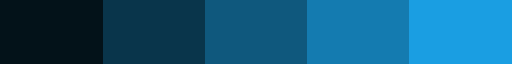

In [24]:
ListedColormap([to_hex(scale_lightness(to_rgb(pal_bgo_3[0]), _)) for _ in [0.1, 0.3, 0.5, 0.7, 0.9]])

In [25]:
score_corr_r, score_corr_p = sstats.pearsonr(ep_pls_result["results"]["x_scores"][:, 0], ep_pls_result["results"]["y_scores"][:, 0])

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(ep_pls_result["results"]["x_scores"][:, 0].reshape(-1, 1), ep_pls_result["results"]["y_scores"][:, 0].reshape(-1, 1))
b = reg.intercept_
m = reg.coef_[0]

In [26]:
plt.close('all')

In [27]:
##### BehavComposite scores correlation

In [28]:
### Behavioral correlations

In [29]:
from statsmodels.stats.multitest import multipletests

# Define the columns
ext_variables = ['physical_aggression_ts', 'affect_ts', 'hostility_ts',
                 'neg_affect_sum_ts', 'perceived_stress_ts',
                 'peer_rejection', 'psych_wellbeing']

In [30]:
# For results_LC1_behv

# Initialize lists to store results
results_LC1_behv = []

# Loop through each pair of columns (2 x 7)
for variables in ext_variables:
    # Drop rows where either column has NaN or 999
    clean_data = post_hoc[['LC1_behv', variables]].dropna()
    clean_data = clean_data[clean_data[variables] != 999]

    # Calculate Pearson correlation
    r_value, p_value = sstats.pearsonr(clean_data['LC1_behv'], clean_data[variables])

    # Calculate degrees of freedom (n - 2)
    n = len(clean_data)
    dof = n - 2

    # Append the results
    results_LC1_behv.append({'col_1': 'LC1_behv', 'col_2': variables, 'r_value': r_value, 'p_value': p_value, 'dof': dof})

In [31]:
# Correct p-values using Benjamini-Hochberg (BH) correction with 7 comparisons
p_values = [result['p_value'] for result in results_LC1_behv]
_, q_values, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Add q-values to the results
for i, q_value in enumerate(q_values):
    results_LC1_behv[i]['q_value'] = q_value

# Convert results to a DataFrame
results_df = pd.DataFrame(results_LC1_behv)

# Display the final results
print(results_df)

      col_1                   col_2   r_value   p_value  dof   q_value
0  LC1_behv  physical_aggression_ts  0.035295  0.715593  107  0.834858
1  LC1_behv               affect_ts  0.089606  0.354140  107  0.495796
2  LC1_behv            hostility_ts  0.226909  0.017658  107  0.047267
3  LC1_behv       neg_affect_sum_ts  0.253593  0.019935   82  0.047267
4  LC1_behv     perceived_stress_ts  0.219151  0.020257  110  0.047267
5  LC1_behv          peer_rejection  0.106965  0.261634  110  0.457860
6  LC1_behv         psych_wellbeing  0.013276  0.889505  110  0.889505


Original data points: 121
Valid data points after removing NaNs: 109


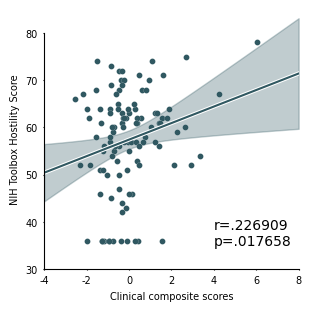

In [34]:
fig, ax = plt.subplots(figsize=(3, 3), layout="constrained")
scatter = ax.scatter(post_hoc["LC1_behv"], post_hoc["hostility_ts"],
                     s=18, color=pal_bgo_3[1], linewidths=0.1, edgecolors='white')

# Add regression line with 95% CI
import numpy as np
import statsmodels.api as sm
import matplotlib.patheffects as pe

# Prepare data for statsmodels (drop any NaN values)
mask = ~np.isnan(post_hoc["LC1_behv"]) & ~np.isnan(post_hoc["hostility_ts"])
X = post_hoc.loc[mask, "LC1_behv"]
y = post_hoc.loc[mask, "hostility_ts"]

# Print counts to debug
print(f"Original data points: {len(post_hoc)}")
print(f"Valid data points after removing NaNs: {len(X)}")

# Fit regression model
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# Create x values for regression line (spanning the x-axis limits)
regline_x = np.linspace(-4, 8, 100)

# Get prediction with confidence intervals
predictions = model.get_prediction(sm.add_constant(regline_x))
pred_summary = predictions.summary_frame(alpha=0.05)

# Plot regression line with path effects (white outline)
ax.plot(regline_x, pred_summary["mean"], lw=1.5, color=pal_bgo_3[1],
        path_effects=[pe.Stroke(linewidth=3, foreground='white'), pe.Normal()])

# Add confidence interval
ax.fill_between(regline_x,
                pred_summary["mean_ci_upper"],
                pred_summary["mean_ci_lower"],
                color=pal_bgo_3[1], zorder=0, alpha=0.3)

ax.set(xlim=(-4, 8), ylim=(30, 85), xticks=[-4, -2, 0, 2, 4, 6, 8], yticks=[30, 40, 50, 60, 70, 80],
      xlabel="Clinical composite scores", ylabel="NIH Toolbox Hostility Score")

# Use the r-value and p-value that you already have
ax.text(4, 35, f"r=.226909\np=.017658", fontsize=10)

sns.despine(top=True, right=True, trim=True, ax=ax)
ax.tick_params(axis=u'both', which=u'both', length=1)
fig.savefig(figs_dir / "NIH Hostility.svg")

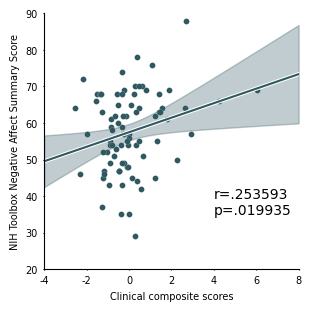

In [35]:
fig, ax = plt.subplots(figsize=(3, 3), layout="constrained")
scatter = ax.scatter(post_hoc["LC1_behv"], post_hoc["neg_affect_sum_ts"],
                     s=18, color=pal_bgo_3[1], linewidths=0.1, edgecolors='white')

# Add regression line with 95% CI
import numpy as np
import statsmodels.api as sm
import matplotlib.patheffects as pe

# Prepare data for statsmodels (drop any NaN values)
mask = ~np.isnan(post_hoc["LC1_behv"]) & ~np.isnan(post_hoc["neg_affect_sum_ts"])
X = post_hoc.loc[mask, "LC1_behv"]
y = post_hoc.loc[mask, "neg_affect_sum_ts"]

# Fit regression model
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# Create x values for regression line (spanning the x-axis limits)
regline_x = np.linspace(-4, 8, 100)

# Get prediction with confidence intervals
predictions = model.get_prediction(sm.add_constant(regline_x))
pred_summary = predictions.summary_frame(alpha=0.05)

# Plot regression line with path effects (white outline)
ax.plot(regline_x, pred_summary["mean"], lw=1.5, color=pal_bgo_3[1],
        path_effects=[pe.Stroke(linewidth=3, foreground='white'), pe.Normal()])

# Add confidence interval
ax.fill_between(regline_x,
                pred_summary["mean_ci_upper"],
                pred_summary["mean_ci_lower"],
                color=pal_bgo_3[1], zorder=0, alpha=0.3)

ax.set(xlim=(-4, 8), ylim=(20, 90), xticks=[-4, -2, 0, 2, 4, 6, 8], yticks=[20, 30, 40, 50, 60, 70, 80, 90],
      xlabel="Clinical composite scores", ylabel="NIH Toolbox Negative Affect Summary Score")

# Keep your original r and p values
ax.text(4, 35, f"r=.253593\np=.019935", fontsize=10)

sns.despine(top=True, right=True, trim=True, ax=ax)
ax.tick_params(axis=u'both', which=u'both', length=1)
fig.savefig(figs_dir / "NIH Negative affect.svg")

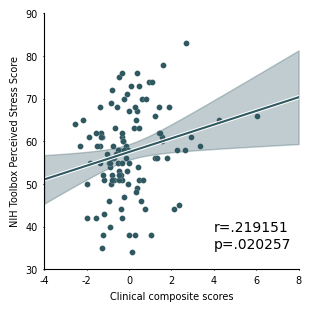

In [37]:
fig, ax = plt.subplots(figsize=(3, 3), layout="constrained")
scatter = ax.scatter(post_hoc["LC1_behv"], post_hoc["perceived_stress_ts"],
                     s=18, color=pal_bgo_3[1], linewidths=0.1, edgecolors='white')


# Prepare data for statsmodels (drop any NaN values)
mask = ~np.isnan(post_hoc["LC1_behv"]) & ~np.isnan(post_hoc["perceived_stress_ts"])
X = post_hoc.loc[mask, "LC1_behv"]
y = post_hoc.loc[mask, "perceived_stress_ts"]

# Fit regression model
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# Create x values for regression line (spanning the x-axis limits)
regline_x = np.linspace(-4, 8, 100)

# Get prediction with confidence intervals
predictions = model.get_prediction(sm.add_constant(regline_x))
pred_summary = predictions.summary_frame(alpha=0.05)

# Plot regression line with path effects (white outline)
ax.plot(regline_x, pred_summary["mean"], lw=1.5, color=pal_bgo_3[1],
        path_effects=[pe.Stroke(linewidth=3, foreground='white'), pe.Normal()])

# Add confidence interval
ax.fill_between(regline_x,
                pred_summary["mean_ci_upper"],
                pred_summary["mean_ci_lower"],
                color=pal_bgo_3[1], zorder=0, alpha=0.3)

ax.set(xlim=(-4, 8), ylim=(30, 90), xticks=[-4, -2, 0, 2, 4, 6, 8], yticks=[30, 40, 50, 60, 70, 80, 90],
      xlabel="Clinical composite scores", ylabel="NIH Toolbox Perceived Stress Score")

# Keep your original r and p values
ax.text(4, 35, f"r=.219151\np=.020257", fontsize=10)

sns.despine(top=True, right=True, trim=True, ax=ax)
ax.tick_params(axis=u'both', which=u'both', length=1)
fig.savefig(figs_dir / "NIH Perceived Stress.svg")

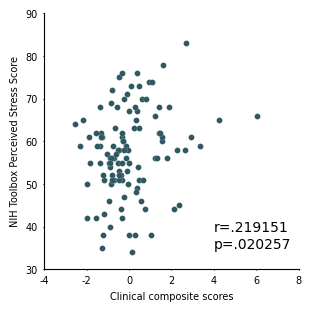

In [ ]:
import statsmodels.api as sm  # Make sure this is imported

fig, ax = plt.subplots(figsize=(3, 3), layout="constrained")

# Plot scatter points
scatter = ax.scatter(post_hoc["LC1_behv"], post_hoc["perceived_stress_ts"],
                     s=18, color=pal_bgo_3[1], linewidths=0.1, edgecolors='white')

# Fit linear regression model
x = post_hoc["LC1_behv"]
y = post_hoc["perceived_stress_ts"]
X = sm.add_constant(x)  # Adds intercept term
model = sm.OLS(y, X).fit()

# Generate predictions with confidence interval
regline_x = np.linspace(-4, 8, 100)  # Match xlim range
X_pred = sm.add_constant(regline_x)
predictions = model.get_prediction(X_pred)
pred_summary = predictions.summary_frame(alpha=0.05)

# Plot regression line and confidence interval
ax.plot(regline_x, pred_summary["mean"], color='#2F4858', lw=1.5, zorder=2)
ax.fill_between(regline_x, pred_summary["mean_ci_upper"], pred_summary["mean_ci_lower"],
                color="#A9BBC5", zorder=1, alpha=0.4)

ax.set(xlim=(-4, 8), ylim=(30, 90),
      xticks=[-4, -2, 0, 2, 4, 6, 8], yticks=[30, 40, 50, 60, 70, 80, 90],
      xlabel="Clinical composite scores",
      ylabel="NIH Toolbox Perceived Stress Score")

ax.text(4, 35, f"r=.219151\np=.020257", fontsize=10)

sns.despine(top=True, right=True, trim=True, ax=ax)
ax.tick_params(axis=u'both', which=u'both', length=1)

In [ ]:
# For results_LC1_brain

# Initialize lists to store results
results_LC1_brain = []

# Loop through each pair of columns (2 x 7)
for variables in ext_variables:
    # Drop rows where either column has NaN or 999
    clean_data = post_hoc[['LC1_brain', variables]].dropna()
    clean_data = clean_data[clean_data[variables] != 999]

    # Calculate Pearson correlation
    r_value, p_value = sstats.pearsonr(clean_data['LC1_brain'], clean_data[variables])

    # Calculate degrees of freedom (n - 2)
    n = len(clean_data)
    dof = n - 2

    # Append the results
    results_LC1_brain.append({'col_1': 'LC1_brain', 'col_2': variables, 'r_value': r_value, 'p_value': p_value, 'dof': dof})

In [ ]:
# Correct p-values using Benjamini-Hochberg (BH) correction with 7 comparisons
p_values = [result['p_value'] for result in results_LC1_brain]
_, q_values, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Add q-values to the results
for i, q_value in enumerate(q_values):
    results_LC1_brain[i]['q_value'] = q_value

# Convert results to a DataFrame
results_df = pd.DataFrame(results_LC1_brain)

# Display the final results
print(results_df)

       col_1                   col_2   r_value   p_value  dof   q_value
0  LC1_brain  physical_aggression_ts  0.119383  0.216289  107  0.501570
1  LC1_brain               affect_ts  0.075827  0.433241  107  0.505448
2  LC1_brain            hostility_ts  0.134231  0.164054  107  0.501570
3  LC1_brain       neg_affect_sum_ts  0.090316  0.413913   82  0.505448
4  LC1_brain     perceived_stress_ts  0.101567  0.286611  110  0.501570
5  LC1_brain          peer_rejection  0.034113  0.721035  110  0.721035
6  LC1_brain         psych_wellbeing -0.178133  0.060232  110  0.421626


In [ ]:
### Figure plotting for behavioral correlations

In [ ]:
# Drop rows where either column has NaN
clean_data = post_hoc[['LC1_behv', 'hostility_ts']].dropna()
clean_data = clean_data[clean_data['hostility_ts']!= 999]

# Calculate Pearson correlation
score_corr_r, score_corr_p = sstats.pearsonr(clean_data["LC1_behv"], clean_data["hostility_ts"])

fig, ax = plt.subplots(figsize=(3, 3), layout="constrained")
scatter = ax.scatter(post_hoc["LC1_behv"], post_hoc["hostility_ts"],
           s=18, c=post_hoc['group_code'], cmap=cmap_bgo_3, linewidths=0.1, edgecolors='white')
# ax.axvline(x=0, c="silver", zorder=0, ls=(0, (2, 1)))
# ax.axhline(y=0, c="silver", zorder=0, ls=(0, (2, 1)))

reg_x = np.arange(-20, np.max(post_hoc["LC1_behv"]), 0.1)
#ax.plot(reg_x, m * reg_x + b, color="gray", zorder=0.5)

ax.set(xlim=(-8, 8), ylim=(0, 150), xticks=[-8, -6, -4, -2, 0, 2, 4, 6, 8], yticks=[0, 25, 50, 75, 100, 125, 150],
       xlabel="Clinical composite scores", ylabel="hostility scores")


ax.text(-6, 15, f"r={score_corr_r:.2f}\np={score_corr_p:.2e}", fontsize=10)

sns.despine(top=True, right=True, trim=True, ax=ax)
ax.tick_params(axis=u'both', which=u'both', length=1)

handles, previous_labels = scatter.legend_elements()
legend = ax.legend(handles=handles, labels=group_names_short, loc="lower right", bbox_to_anchor=(1, 0), frameon=False)
ax.add_artist(legend)
# fig.savefig(figs_dir / "hcpep_score_corr_dccs_Clinical.svg")

In [ ]:
##### DCCS correlations

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3), layout="constrained")
scatter = ax.scatter(ep_pls_result["results"]["x_scores"][:, 0], ep_pls_result["results"]["y_scores"][:, 0],
           s=18, c=post_hoc['group_code'], cmap=cmap_bgo_3, linewidths=0.1, edgecolors='white')
ax.axvline(x=0, c="silver", zorder=0, ls=(0, (2, 1)))
ax.axhline(y=0, c="silver", zorder=0, ls=(0, (2, 1)))

reg_x = np.arange(-20, np.max(ep_pls_result["results"]["x_scores"][:, 0]), 0.1)
#ax.plot(reg_x, m * reg_x + b, color="gray", zorder=0.5)

ax.set(xlim=(-300, 300), ylim=(-6, 8), xticks=[-300, -200, -100, 0, 100, 200, 300], yticks=[-6, -4, -2, 0, 2, 4, 6, 8],
       xlabel="RSFC composite scores", ylabel="Clinical composite scores")

ax.text(100, -5, f"r={score_corr_r:.2f}\np={score_corr_p:.2e}", fontsize=10)

sns.despine(top=True, right=True, trim=True, ax=ax)
ax.tick_params(axis=u'both', which=u'both', length=1)

handles, previous_labels = scatter.legend_elements()
legend = ax.legend(handles=handles, labels=group_names_short, loc="upper left", bbox_to_anchor=(0, 1.0), frameon=False)
ax.add_artist(legend)
fig.savefig(figs_dir / "hcpep_score_corr.svg")

In [ ]:
# Drop rows where either column has NaN
clean_data = post_hoc[['LC1_behv', 'nih_flanker_ageadjusted']].dropna()

fig, ax = plt.subplots(figsize=(3, 3), layout="constrained")
scatter = ax.scatter(post_hoc["LC1_behv"], post_hoc["nih_flanker_ageadjusted"],
           s=18, c=post_hoc['group_code'], cmap=cmap_bgo_3, linewidths=0.1, edgecolors='white')
# ax.axvline(x=0, c="silver", zorder=0, ls=(0, (2, 1)))
# ax.axhline(y=0, c="silver", zorder=0, ls=(0, (2, 1)))

reg_x = np.arange(-20, np.max(post_hoc["LC1_behv"]), 0.1)
#ax.plot(reg_x, m * reg_x + b, color="gray", zorder=0.5)

ax.set(xlim=(-8, 8), ylim=(0, 150), xticks=[-8, -6, -4, -2, 0, 2, 4, 6, 8], yticks=[0, 25, 50, 75, 100, 125, 150],
       xlabel="Clinical composite scores", ylabel="Flanker scores")

# Drop rows where either column has NaN
clean_data = post_hoc[['LC1_behv', 'nih_flanker_ageadjusted']].dropna()
# Calculate Pearson correlation
score_corr_r, score_corr_p = sstats.pearsonr(clean_data["LC1_behv"], clean_data["nih_flanker_ageadjusted"])
ax.text(-6, 15, f"r={score_corr_r:.2f}\np={score_corr_p:.2e}", fontsize=10)

sns.despine(top=True, right=True, trim=True, ax=ax)
ax.tick_params(axis=u'both', which=u'both', length=1)

handles, previous_labels = scatter.legend_elements()
legend = ax.legend(handles=handles, labels=group_names_short, loc="lower right", bbox_to_anchor=(1, 0), frameon=False)
ax.add_artist(legend)
fig.savefig(figs_dir / "hcpep_score_corr_flanker_Clinical.svg")

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3), layout="constrained")
scatter = ax.scatter(post_hoc["LC1_brain"], post_hoc["nih_flanker_ageadjusted"],
           s=18, c=post_hoc['group_code'], cmap=cmap_bgo_3, linewidths=0.1, edgecolors='white')
# ax.axvline(x=0, c="silver", zorder=0, ls=(0, (2, 1)))
# ax.axhline(y=0, c="silver", zorder=0, ls=(0, (2, 1)))

reg_x = np.arange(-20, np.max(post_hoc["LC1_brain"]), 0.1)
#ax.plot(reg_x, m * reg_x + b, color="gray", zorder=0.5)

ax.set(xlim=(-300, 300), ylim=(0, 150), xticks=[-300, -200, -100, 0, 100, 200, 300], yticks=[0, 25, 50, 75, 100, 125, 150],
       xlabel="RSFC composite scores", ylabel="Flanker scores")

# Drop rows where either column has NaN
clean_data = post_hoc[['LC1_brain', 'nih_flanker_ageadjusted']].dropna()
# Calculate Pearson correlation
score_corr_r, score_corr_p = sstats.pearsonr(clean_data["LC1_brain"], clean_data["nih_flanker_ageadjusted"])
ax.text(-200, 15, f"r={score_corr_r:.2f}\np={score_corr_p:.2e}", fontsize=10)


sns.despine(top=True, right=True, trim=True, ax=ax)
ax.tick_params(axis=u'both', which=u'both', length=1)

handles, previous_labels = scatter.legend_elements()
legend = ax.legend(handles=handles, labels=group_names_short, loc="lower right", bbox_to_anchor=(1, 0), frameon=False)
ax.add_artist(legend)
fig.savefig(figs_dir / "hcpep_score_corr_flanker_RSFC.svg")

In [ ]:
def plot_raincloud(x, ax):
    pos = np.array([1, 2, 3])
    v1 = ax.violinplot(x, positions=pos+0.2,
                    showmeans=False, showextrema=False, showmedians=False)

    for b, c in zip(v1['bodies'], pal_bgo_3):
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_facecolor(c)
        b.set_linewidth(0)

    b1 = ax.boxplot(x, positions=pos, patch_artist=True, widths=0.15)

    for item in ['boxes']:
        for patch, c in zip(b1[item], pal_bgo_3):
            plt.setp(patch, facecolor=c, edgecolor=to_hex(scale_lightness(to_rgb(c), 0.75)))
    for item in ['medians']:
        for patch, c in zip(b1[item], pal_bgo_3):
            plt.setp(patch, color=c)
    for item in ['whiskers', 'caps']:
        for i, patch in enumerate(b1[item]):
            c = pal_bgo_3[int(i/2)]
            plt.setp(patch, color=to_hex(scale_lightness(to_rgb(c), 0.75)))
    for item in ['fliers']:
        for patch, c in zip(b1[item], pal_bgo_3):
            plt.setp(patch, markeredgecolor=c)

    e1 = ax.eventplot(x, orientation="vertical", lineoffsets=pos-0.2, linelengths=0.1, colors=pal_bgo_3)

    return v1, b1, e1

In [ ]:
for i, j in [(0, 1), (0, 2), (1, 2)]:
    print(pingouin.ttest(x_scores_grouped[i], x_scores_grouped[j]))

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4), layout="constrained")
v1, b1, e1 = plot_raincloud(x_scores_grouped, ax)

ax.set(ylim=(-350, 350), yticks=[-300, -200, -100, 0, 100, 200, 300])
ax.set_ylabel("RSFC composite scores", fontsize=12)
ax.set_xticklabels(group_names_short, fontsize=10)

sns.despine(top=True, right=True, trim=True, ax=ax)
ax.tick_params(axis=u'both', which=u'both', length=0)

fig.savefig(figs_dir / "hcpep_x_scores.svg")

In [ ]:
for i, j in [(0, 1), (0, 2), (1, 2)]:
    print(pingouin.ttest(y_scores_grouped[i], y_scores_grouped[j]))

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4), layout="constrained")
v1, b1, e1 = plot_raincloud(y_scores_grouped, ax)

ax.set(ylim=(-5, 10), yticks=[-4, 0, 4, 8])
ax.set_ylabel("RSFC composite scores", fontsize=12)
ax.set_xticklabels(group_names_short, fontsize=10)

sns.despine(top=True, right=True, trim=True, ax=ax)
ax.tick_params(axis=u'both', which=u'both',length=0)


fig.savefig(figs_dir / "hcpep_y_scores.svg")

In [ ]:
ep_pls_loadings = h5py.File(data_dir / "EP_RSFC_pls_loadings_200P.hdf5")

In [ ]:
ep_pls_xload = ep_pls_loadings["results/y_loadings"][:, 0]
ep_pls_xload_resort = np.argsort(-1 * ep_pls_loadings["results/y_loadings"][:, 0])
ep_pls_xload_top_idx = np.where(np.abs(sstats.zscore(ep_pls_xload)) > 2)[0]
ep_pls_xload_sq_top_idx = np.where(np.abs(sstats.zscore(ep_pls_xload ** 2)) > 2)[0]
ep_pls_xload_err = (ep_pls_loadings["results/bootres/y_loadings_ci"][:, 0, 1]- ep_pls_loadings["results/bootres/y_loadings_ci"][:, 0, 0]) / 2
ep_pls_xload_top_resort = np.argsort(-1 * ep_pls_loadings["results/y_loadings"][ep_pls_xload_top_idx, 0])
ep_pls_xload_sq_top_resort = np.argsort(-1 * ep_pls_loadings["results/y_loadings"][ep_pls_xload_sq_top_idx, 0])

In [ ]:
diff_pred_names = np.loadtxt(data_dir / "JHU_labels.txt", delimiter="\t", dtype=str)

In [ ]:
diff_pred_names_optimized = ["(" + _.replace("_", ") ") for _ in diff_pred_names]
diff_pred_names_optimized = np.array(diff_pred_names_optimized)

In [ ]:
diff_pred_names_optimized = ["(" + _.replace("_", ") ") for _ in diff_pred_names]
for i in range(len(diff_pred_names_optimized)):
    curr_name = diff_pred_names_optimized[i]
    curr_new = curr_name.split(" ")
    if len(curr_name) >= 40:
        curr_new.insert(-3, "\n")
    elif 40 > len(curr_name) > 25:
        curr_new.insert(-2, "\n")
    diff_pred_names_optimized[i] = " ".join(curr_new)
diff_pred_names_optimized = np.array(diff_pred_names_optimized)

In [ ]:
# fig, ax = plt.subplots(figsize=(2.5, 16))
# ax.barh(np.arange(len(ep_pls_xload_resort)), ep_pls_xload[ep_pls_xload_resort],
#         xerr=ep_pls_xload_err[ep_pls_xload_resort])
# ax.set(yticks=np.arange(len(ep_pls_xload_resort)), yticklabels=diff_pred_names_optimized[ep_pls_xload_resort])
# ax.invert_yaxis()
# sns.despine(top=True, right=True, ax=ax)
# ax.tick_params(axis=u'both', which=u'both', length=0)

In [ ]:
fig, ax = plt.subplots(figsize=(3.0, 3.0), layout="constrained")
ax.barh(np.arange(len(ep_pls_xload_sq_top_resort)), ep_pls_xload[ep_pls_xload_sq_top_idx][ep_pls_xload_sq_top_resort],
        xerr=ep_pls_xload_err[ep_pls_xload_sq_top_idx][ep_pls_xload_sq_top_resort], color=pal_bgo_3[1], height=0.8,
        error_kw=dict(ecolor=pal_bgo_3[1], lw=1, capsize=2, capthick=1))
ax.set(xticks=[0, 0.2, 0.4, 0.6],
       #yticks=np.arange(len(ep_pls_xload_sq_top_resort)), yticklabels=diff_pred_names_optimized[ep_pls_xload_sq_top_idx][ep_pls_xload_sq_top_resort])
       yticks=np.arange(len(ep_pls_xload_sq_top_resort)), yticklabels=diff_pred_names_optimized[ep_pls_xload_sq_top_idx][ep_pls_xload_sq_top_resort])

ax.invert_yaxis()
sns.despine(top=True, right=True, ax=ax)
ax.tick_params(axis=u'both', which=u'both', length=0)

fig.savefig(figs_dir / "hcpep_xload.svg")

In [ ]:
3# fig, ax = plt.subplots(figsize=(3, 3), layout="constrained")
# ax.barh(np.arange(len(ep_pls_xload_top_resort)), ep_pls_xload[ep_pls_xload_top_idx][ep_pls_xload_top_resort],
#         xerr=ep_pls_xload_err[ep_pls_xload_top_idx][ep_pls_xload_top_resort], color=pal_bgo_3[0], height=0.75,
#         error_kw=dict(ecolor=pal_bgo_3[1], lw=1, capsize=2, capthick=1))
# ax.set(xticks=[-0.6, -0.4, -0.2, 0],
#        yticks=np.arange(len(ep_pls_xload_top_resort)), yticklabels=diff_pred_names_optimized[ep_pls_xload_top_idx][ep_pls_xload_top_resort])
# ax.invert_yaxis()
# sns.despine(top=True, right=True, ax=ax)
# ax.tick_params(axis=u'both', which=u'both', length=0)

In [ ]:
ep_pls_yload = ep_pls_result["results/y_loadings"][:, 0]
ep_pls_yload_err = (ep_pls_result["results/bootres/y_loadings_ci"][:, 0, 1]- ep_pls_result["results/bootres/y_loadings_ci"][:, 0, 0]) / 2

ep_pls_yload_resort = np.argsort(-1 * ep_pls_result["results/y_loadings"][:, 0])
ep_pls_yload_top_idx = np.where(
    (np.abs(sstats.zscore(ep_pls_yload)) > 1)
    & ((np.abs(ep_pls_yload)-ep_pls_yload_err)>0)
    )[0]
ep_pls_yload_sq_top_idx = np.where(
    (np.abs(sstats.zscore(ep_pls_yload ** 2)) > 1)
    & ((np.abs(ep_pls_yload)-ep_pls_yload_err)>0)
    )[0]
ep_pls_yload_top_resort = np.argsort(-1 * ep_pls_result["results/y_loadings"][ep_pls_yload_top_idx, 0])
ep_pls_yload_sq_top_resort = np.argsort(-1 * ep_pls_result["results/y_loadings"][ep_pls_yload_sq_top_idx, 0])

In [ ]:
ep_pls_yload_sq_top_idx

In [ ]:
ep_scores = pd.read_csv(data_dir / "EP_scores.csv")

In [ ]:
score_dimension_to_color = {"pos": "#5C554A", "neg": "#31A9E7", "gen": "#345662", "mania": "#F19100"}

In [ ]:
ep_scores["text_color"] = ep_scores["dimension"].map(score_dimension_to_color)

In [ ]:
for i in range(len(ep_scores)):
    curr_name = ep_scores.loc[i, "description"]
    curr_new = curr_name.split(" ")
    if len(curr_name) >= 40:
        curr_new.insert(-3, "\n")
    elif 40 > len(curr_name) > 23:
        curr_new.insert(-2, "\n")
    ep_scores.loc[i, "description"] = " ".join(curr_new)

In [ ]:
temp = pd.DataFrame(columns=['symptoms', 'coef', 'se'])
temp['symptoms'] = ep_scores["description"].to_numpy()
temp['coef'] = ep_pls_yload
temp['se'] = ep_pls_yload_err

temp


In [ ]:
fig, ax = plt.subplots(figsize=(3.0, 2.5), layout="constrained")

plot_x = np.arange(len(ep_pls_yload_sq_top_resort))
plot_y = ep_pls_yload[ep_pls_yload_sq_top_idx][ep_pls_yload_sq_top_resort]
plot_error = ep_pls_yload_err[ep_pls_yload_sq_top_idx][ep_pls_yload_sq_top_resort]
plot_y_ticklabels = ep_scores["description"].to_numpy()[ep_pls_yload_sq_top_idx][ep_pls_yload_sq_top_resort]
plot_y_ticklabels_color = ep_scores["text_color"].to_numpy()[ep_pls_yload_sq_top_idx][ep_pls_yload_sq_top_resort]
plot_y_pos = np.where(plot_y>0)[0]
plot_y_neg = np.where(plot_y<0)[0]

ax.axvline(x=0, c="black", lw=0.5)

ax.barh(plot_x, plot_y, xerr=plot_error, color=plot_y_ticklabels_color, height=0.75,
        error_kw=dict(ecolor="lightgray", lw=1, capsize=2, capthick=1))
ax.set(xticks=[-0.25, 0, 0.25, 0.5], yticks=plot_x, yticklabels=[])
ax.invert_yaxis()
sns.despine(top=True, right=True, left=True, ax=ax)
ax.tick_params(axis=u'both', which=u'both', length=0)

for i in plot_y_pos:
    ax.text(-0.05, plot_x[i], plot_y_ticklabels[i], ha="right", va="center",
            color="k")
for i in plot_y_neg:
    ax.text(0.05, plot_x[i], plot_y_ticklabels[i], ha="left", va="center",
            color="k")

fig.savefig(figs_dir / "hcpep_yload.svg")

In [ ]:
from pycirclize import Circos

In [ ]:
ep_scores["yload"] = ep_pls_yload
ep_pls_yload_sq_top_score_names = ep_scores["description"].to_numpy()[ep_pls_yload_sq_top_idx][ep_pls_yload_sq_top_resort]

In [ ]:
ep_scores[ep_scores["dimension"]=="neg"].sort_values("neg_domains")

In [ ]:
with matplotlib.rc_context({"svg.fonttype": "path"}):
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'}, layout="constrained")

    sectors = {"Mania": 11, "General": 16, "Negative": 7, "Positive": 7}
    circos = Circos(
        sectors, space=10,
        sector2clockwise = {"Positive": False, "Negative": False, "General": False, "Mania": True}
        )

    for sector, dim in zip(circos.sectors, ["mania", "gen", "neg", "pos"]):

        sector.rect(r_lim=(35, 38), color=score_dimension_to_color[dim])
        sector.text(f"{sector.name}", r=27, size=10, color=score_dimension_to_color[dim])

        curr_ep_scores = ep_scores[ep_scores["dimension"]==dim]
        # if dim == "neg":
        #     curr_ep_scores = curr_ep_scores.sort_values("neg_domains")
        # sort
        curr_ep_scores = curr_ep_scores.sort_values("yload", ascending=False)

        plot_x = np.arange(len(curr_ep_scores)) + 0.5
        plot_y = curr_ep_scores["yload"].to_numpy()
        plot_ylabel = curr_ep_scores["description"].to_numpy()
        vmin, vmax = -0.23, 0.33

        track = sector.add_track((40, 95), r_pad_ratio=0.1)
        # track.axis()
        track.xticks(plot_x, plot_ylabel, label_orientation="vertical", tick_length=0,
                    text_kws={"color": score_dimension_to_color[dim]}, label_size=10)
        track.yticks(y=[-0.2, -0.1, 0, 0.1, 0.2, 0.3], vmin=vmin, vmax=vmax,
                    labels=[-0.2, -0.1, 0, 0.1, 0.2, 0.3], tick_length=0)

        track.line(plot_x, [0]*len(plot_x), vmin=vmin, vmax=vmax, arc=True, color="darkgray", lw=2, zorder=1)
        for i in [-0.2, -0.1, 0.1, 0.2, 0.3]:
            track.line(plot_x, [i]*len(plot_x), vmin=vmin, vmax=vmax, arc=True, color="silver", zorder=1)
        track.bar(plot_x, plot_y, vmin=vmin, vmax=vmax, color=score_dimension_to_color[dim], zorder=3)

        plot_ylabel_sig_idx = [i for i, _ in enumerate(plot_ylabel) if _ in ep_pls_yload_sq_top_score_names]
        for curr_idx in plot_ylabel_sig_idx:
            track.bar([plot_x[curr_idx]], [plot_y[curr_idx]], vmin=vmin, vmax=vmax, zorder=2, linewidth=2, edgecolor="tab:red")

    fig = circos.plotfig(ax=ax)
    fig.savefig(figs_dir / "hcpep_yload_circle.svg")